# <center><font color='red' align='center'>Health Insurance Prediction</font></center>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns',None)

## Data Analysing

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.describe(include='all')  # includes the discription for both catogerical and numeric data

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df.isnull().sum()  # checks for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum() # checking for duplicates

1

In [10]:
df.drop_duplicates(inplace=True)   # drops all the duplicates

In [11]:
df.duplicated().sum() # checking for duplicates

0

In [12]:
(df['bmi'] == 0).sum()

0

In [13]:
# zero values in int columns
i = 0 # counter variable
for column in df.columns: 
    if df[column].dtype == 'int64' and (df[column] == 0).sum() != 0:
        i = i+1 
        print(column,df[column].dtype ,(df[column] == 0).sum())
        print(df[column].value_counts())
print('Total number of Features : ',i)

children int64 573
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
Total number of Features :  1


In [14]:
# zero values in float columns
i = 0 # counter variable
for column in df.columns: 
    if df[column].dtype == 'float64' and (df[column] == 0).sum() != 0:
        i = i+1 
        print(column,df[column].dtype ,(df[column] == 0).sum())
        print(df[column].value_counts())
print('Total number of Features : ',i)

Total number of Features :  0


In [15]:
le = LabelEncoder()
for column in df.columns: 
    if df[column].dtype == 'object': 
        df[column] = le.fit_transform(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [16]:
for column in df.columns: 
    print(df[column].value_counts(),'\n')

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64 

sex
1    675
0    662
Name: count, dtype: int64 

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64 

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 

smoker
0    1063
1     274
Name: count, dtype: int64 

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64 

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
        

## Data Visualization

In [17]:
plt.style.available   # checking for ploting styles

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

plt.style.use('seaborn-v0_8-darkgrid')

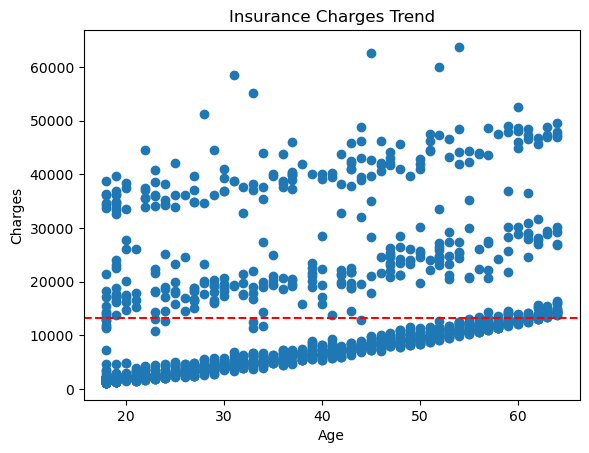

In [18]:
plt.scatter(x=df['age'],y=df['charges'])
plt.title('Insurance Charges Trend')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.axhline(y=df['charges'].mean(),linestyle='--',color='red')   # mean line
plt.show()

### Discription:
This scatter plot shows the <b>trend of the Insurance Charges with respect to age</b>.<br>
This graph shows <b>4 increasing trends</b>. Details are below: 
1. ranges from 0-20000 approx ,increasing trend
2. ranges from 10000-35000 approx ,increasing trend
3. ranges from 30000-50000 approx ,increasing trend
5. ranges from 50000-65000 approx ,increasing trend

The <b>Mean</b> of Charges is <b>13270.422265</b>.

In [19]:
df['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

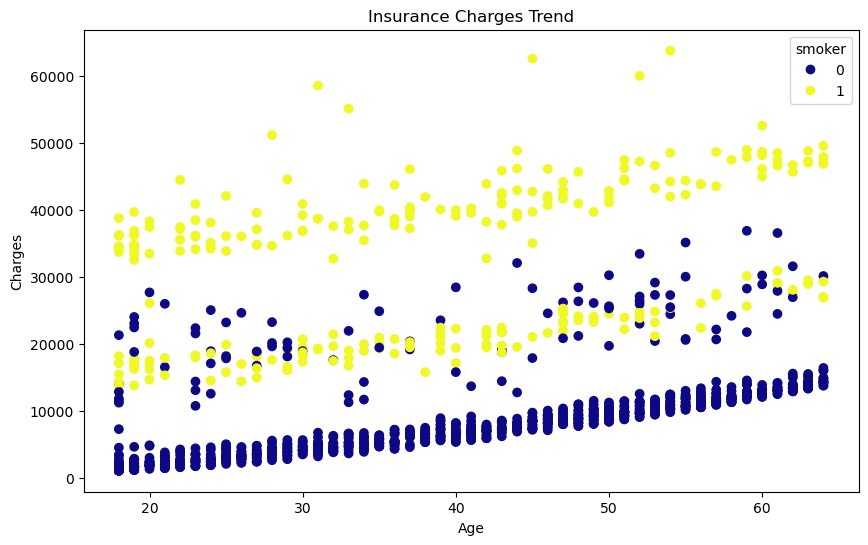

In [20]:
#create figure and graph are
fig , ax = plt.subplots(figsize = (10,6))
#plot data
scatter_plot = ax.scatter(x = df['age'], 
                         y = df['charges'],
                         c = df['smoker'],
                         cmap='plasma')      # legend assigning
#coustomizations
ax.set(title='Insurance Charges Trend',
      xlabel='Age',
      ylabel= 'Charges')
#set legend
ax.legend(*scatter_plot.legend_elements(), title = 'smoker')
plt.show()

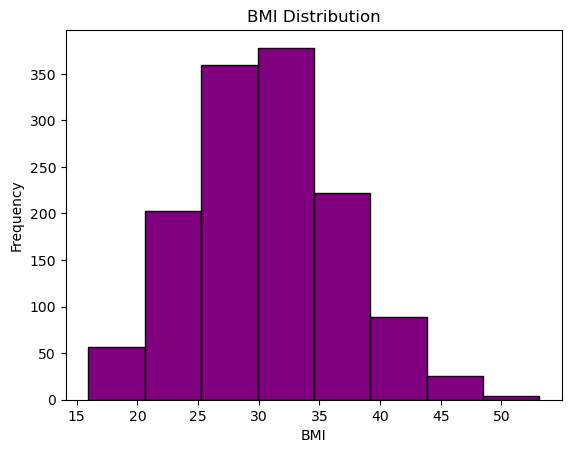

In [21]:
plt.hist(df['bmi'],bins=8,color='purple',edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Description:
This <b>BMI Distribution Histogram</b> is <b>Normally Bell Shaped Distirbuted</b> with following details: 
<ol>
    <li><b>Mean = 30.663397</b></li>
    <li><b>Median = 30.400000</b></li>
</ol>

In [22]:
df['sex'].value_counts() 

sex
1    675
0    662
Name: count, dtype: int64

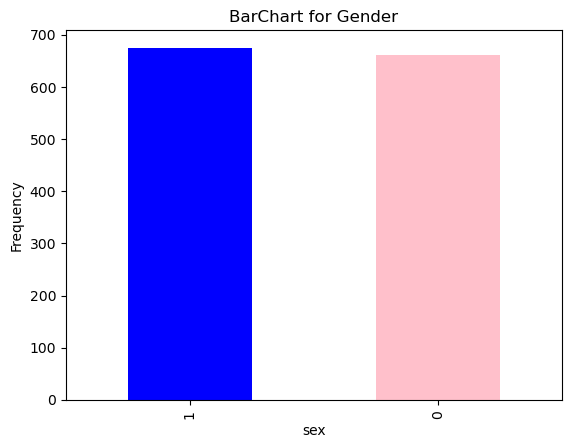

In [23]:
df['sex'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.title("BarChart for Gender")
plt.ylabel('Frequency')
plt.show()

### Discription: 
This Gender/Sex BarChart shows that there is <b>no much diffrence between male</b> and female.Details: 
1. <i><u><b>male = 675 </b></u></i>
2. <b>female = 662</b> 

In [24]:
df['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

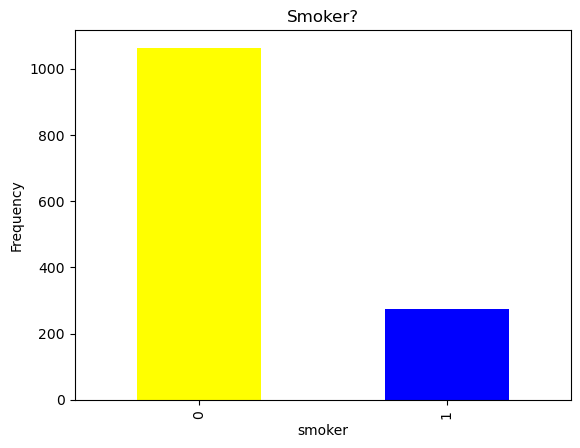

In [25]:
df['smoker'].value_counts().plot(kind='bar',color=['yellow','blue'])
plt.title('Smoker?')
plt.ylabel('Frequency')
plt.show()

### Discription: 
This Smoker? BarChart shows that <b>Non-Smoker are in greater number as compared to Smokers</b>. Details: 
1. <i><u><b>Non-Smoker = 1063</b></u></i>
2. <b>Smoker = 274</b>

In [26]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

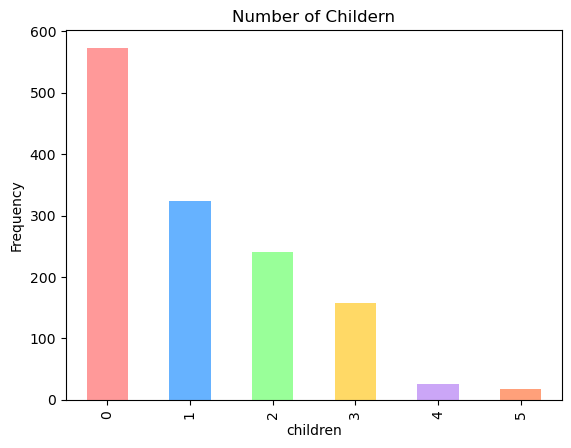

In [27]:
df['children'].value_counts().plot(kind='bar', 
                                   color = ["#FF9999", "#66B2FF", "#99FF99", "#FFD966", "#CBA6F7", "#FFA07A"])
plt.title("Number of Childern")
plt.ylabel("Frequency")
plt.show()

### Discription: 
This Graph shows that <b>the people having NO Childern are in Greater then the people having childern</b>. Details:
1. <i><u><b>No Child = 573</b></u></i>
2. <b>1-Child = 324</b>
3. <b>2-Childern = 240</b>
4. <b>3-Childern = 157</b>
5. <b>4-Childern = 25</b>
6. <b>5-Childern = 18</b>

In [28]:
df['region'].value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

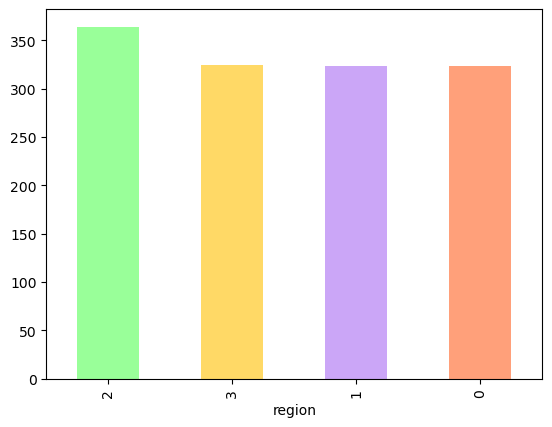

In [29]:
df['region'].value_counts().plot(kind='bar',
                                color = ["#99FF99", "#FFD966", "#CBA6F7", "#FFA07A"])
plt.show()

### Discription: 
This Graph shows the Number of sampels associated to the region , it shows that <b>all regins</b> are <b>approx simmilar frequencies</b>. Details:
1. <i><u><b>southeast = 364</b></u></i>
2. <b>southwest = 325</b>
3. <b>northwest = 324</b>
4. <b>northeast = 324</b>

## Dash board

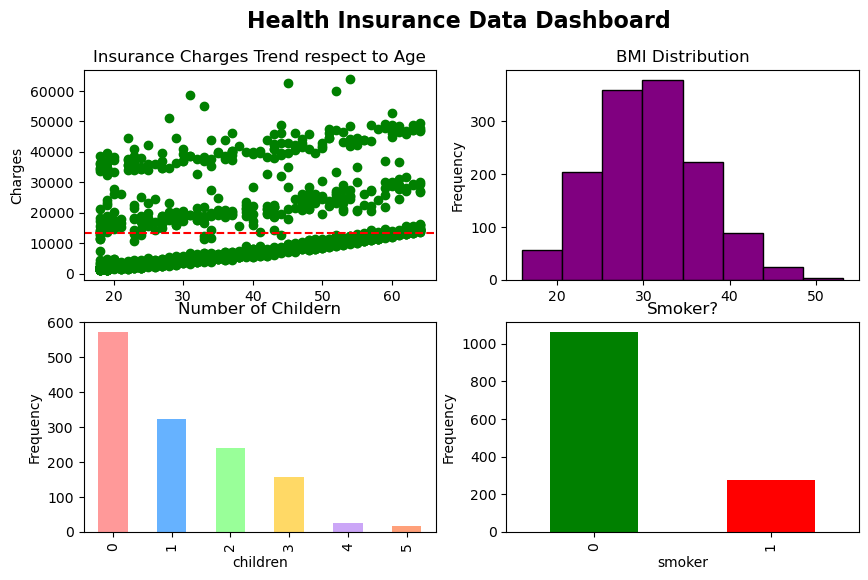

In [30]:
fig , ax = plt.subplots(nrows=2,ncols=2 ,figsize=(10,6))

fig.suptitle("Health Insurance Data Dashboard", fontsize=16, fontweight='bold')                  # Major Title

# Plot 1
ax[0,0].scatter(x=df['age'], y=df['charges'], color='green')
ax[0,0].set(title='Insurance Charges Trend respect to Age', ylabel='Charges')
ax[0,0].axhline(y=df['charges'].mean(), linestyle='--', color='red')                       # mean line

# Plot 2
ax[0,1].hist(x=df['bmi'],bins=8,color='purple',edgecolor='black')
ax[0,1].set(title='BMI Distribution', ylabel='Frequency')

# Plot 3 
df['children'].value_counts().plot(kind='bar', color = ["#FF9999", "#66B2FF", "#99FF99", "#FFD966", "#CBA6F7", "#FFA07A"], ax=ax[1,0])
ax[1,0].set(title='Number of Childern', ylabel='Frequency')

# Plot 4 
df['smoker'].value_counts().plot(kind='bar',color=['green','red'],ax=ax[1,1])
ax[1,1].set(title='Smoker?', ylabel='Frequency')

plt.show()

## Machine Learning

In [31]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


### Encoding Categorical Data

df['sex'] = df['sex'].map({'female':0,'male':1})

df['smoker'] = df['smoker'].map({'no':0,'yes':1})

df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

df.head()

df.to_csv("m_insurance.csv",index=False)

In [32]:
correlation = df.corr()
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

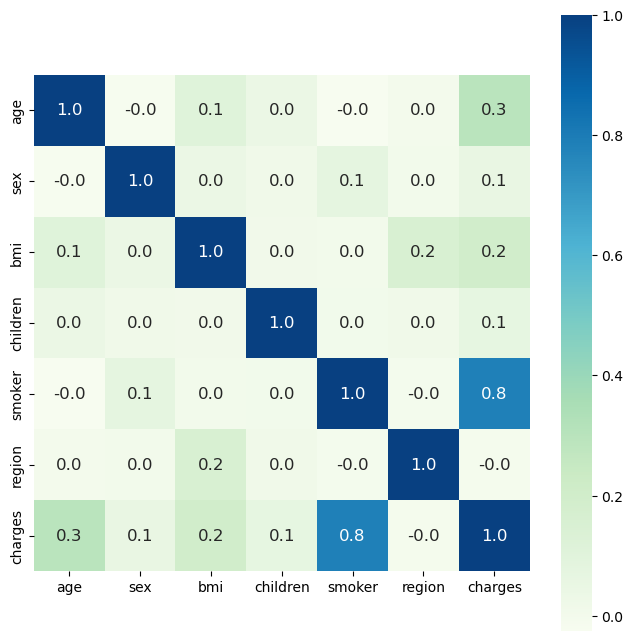

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,square=True,fmt='.1f',cmap='GnBu',
            annot=True,annot_kws={'size':12})

In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: >

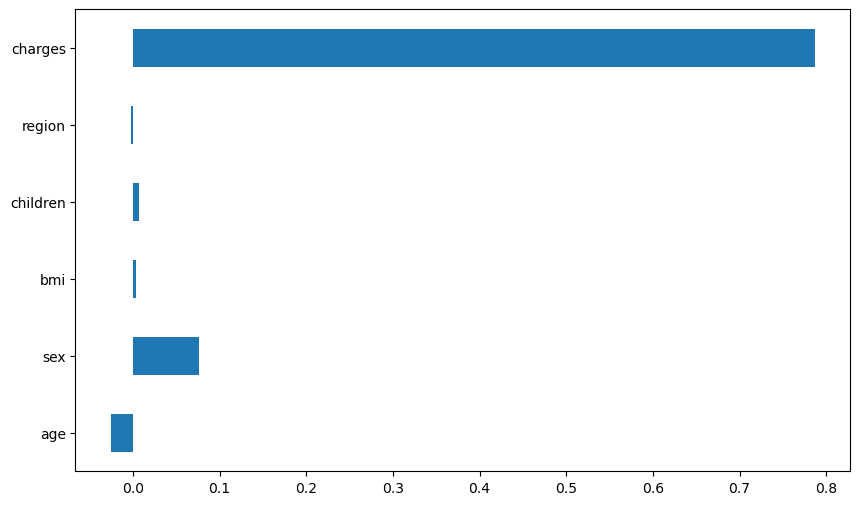

In [35]:
correlation_values = df.corr()['smoker'].drop('smoker')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [36]:
# it will sugest the columns to drop respect to correlation 
i = 0 # counter variable
for column in df.columns: 
    if (correlation[column] <= 0).sum() >3 :
        i = i+1
        print(i,column,(correlation[column] <= 0).sum())

print('Total Features: ',i)

Total Features:  0


Hence ther are no  such columns to drop!

### Applying Models

# Random Forest Classifier

In [37]:
X = df.drop(['smoker'],axis=1)
y = df['smoker']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

rfc = RandomForestClassifier(n_estimators=7, random_state=15)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=15)

### Training

In [38]:
training_pred = rfc.predict(X_train)
training_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy = ",accuracy)

Accuracy =  0.9940119760479041


In [40]:
cm = confusion_matrix(y_train,training_pred)
cm

array([[793,   4],
       [  2, 203]], dtype=int64)

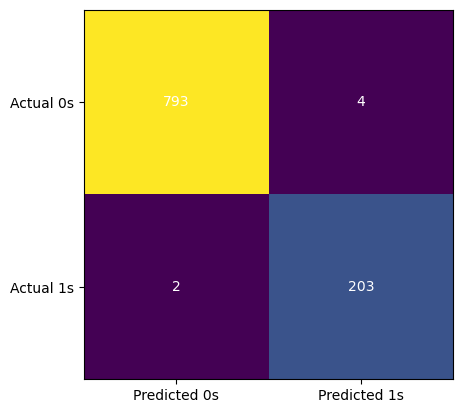

In [41]:
fig,ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [42]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       797
           1       0.98      0.99      0.99       205

    accuracy                           0.99      1002
   macro avg       0.99      0.99      0.99      1002
weighted avg       0.99      0.99      0.99      1002



### Testing

In [43]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [44]:
accuracy = accuracy_score(y_test,y_pred_rfc)
print("Accuracy = ",accuracy)

Accuracy =  0.9582089552238806


In [45]:
cm = confusion_matrix(y_test,y_pred_rfc)
cm

array([[256,  10],
       [  4,  65]], dtype=int64)

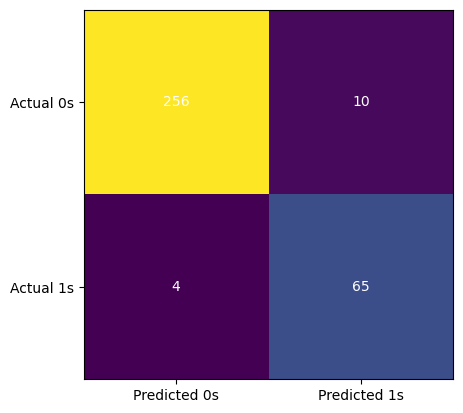

In [46]:
fig,ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [47]:
report = classification_report(y_test,y_pred_rfc)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       266
           1       0.87      0.94      0.90        69

    accuracy                           0.96       335
   macro avg       0.93      0.95      0.94       335
weighted avg       0.96      0.96      0.96       335



# XGBoost Calssifier

In [48]:
xgboost = XGBClassifier(n_estimators=7 ,random_state=15)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=7,
              n_jobs=None, num_parallel_tree=None, ...)

### Training

In [49]:
training_pred = xgboost.predict(X_train)
training_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy = ",accuracy)

Accuracy =  0.9830339321357285


In [51]:
cm = confusion_matrix(y_train,training_pred)
cm

array([[784,  13],
       [  4, 201]], dtype=int64)

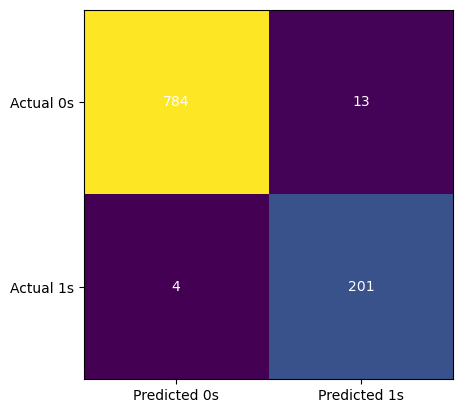

In [52]:
fig,ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [53]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       797
           1       0.94      0.98      0.96       205

    accuracy                           0.98      1002
   macro avg       0.97      0.98      0.97      1002
weighted avg       0.98      0.98      0.98      1002



### Testing

In [54]:
y_pred_xgb = xgboost.predict(X_test)
y_pred_xgb

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [55]:
accuracy = accuracy_score(y_test,y_pred_xgb)
print("Accuracy = ",accuracy)

Accuracy =  0.9671641791044776


In [57]:
cm = confusion_matrix(y_test,y_pred_xgb)
cm

array([[259,   7],
       [  4,  65]], dtype=int64)

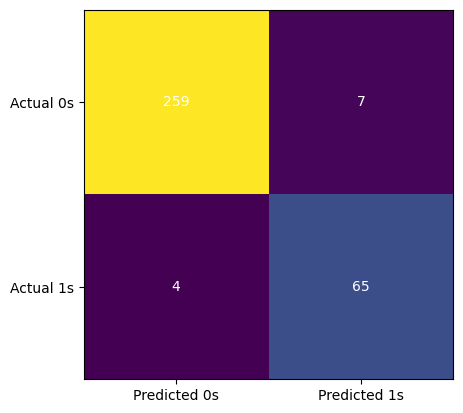

In [58]:
fig,ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [59]:
report = classification_report(y_test,y_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       266
           1       0.90      0.94      0.92        69

    accuracy                           0.97       335
   macro avg       0.94      0.96      0.95       335
weighted avg       0.97      0.97      0.97       335



# Catboost

In [60]:
cboost = CatBoostClassifier()
cboost.fit(X_train,y_train)

Learning rate set to 0.010311
0:	learn: 0.6743073	total: 59.6ms	remaining: 59.6s
1:	learn: 0.6566050	total: 65.3ms	remaining: 32.6s
2:	learn: 0.6409916	total: 71ms	remaining: 23.6s
3:	learn: 0.6230916	total: 82.5ms	remaining: 20.5s
4:	learn: 0.6081045	total: 95.6ms	remaining: 19s
5:	learn: 0.5934829	total: 117ms	remaining: 19.3s
6:	learn: 0.5764666	total: 123ms	remaining: 17.4s
7:	learn: 0.5632183	total: 128ms	remaining: 15.8s
8:	learn: 0.5485979	total: 132ms	remaining: 14.5s
9:	learn: 0.5316652	total: 144ms	remaining: 14.3s
10:	learn: 0.5187637	total: 151ms	remaining: 13.5s
11:	learn: 0.5049235	total: 156ms	remaining: 12.8s
12:	learn: 0.4936781	total: 160ms	remaining: 12.1s
13:	learn: 0.4813958	total: 164ms	remaining: 11.5s
14:	learn: 0.4698573	total: 167ms	remaining: 11s
15:	learn: 0.4585184	total: 172ms	remaining: 10.6s
16:	learn: 0.4465306	total: 176ms	remaining: 10.2s
17:	learn: 0.4343974	total: 182ms	remaining: 9.94s
18:	learn: 0.4246044	total: 186ms	remaining: 9.62s
19:	learn: 0

### Training

In [61]:
training_pred = cboost.predict(X_train)
training_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy = ",accuracy)

Accuracy =  1.0


In [63]:
cm = confusion_matrix(y_train,training_pred)
cm

array([[797,   0],
       [  0, 205]], dtype=int64)

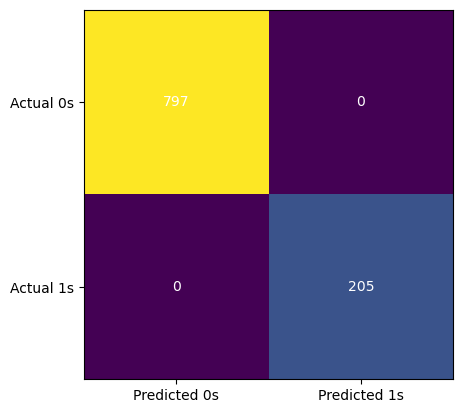

In [64]:
fig,ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [67]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       797
           1       1.00      1.00      1.00       205

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002



### Testing

In [68]:
y_pred_cat = cboost.predict(X_test)
y_pred_cat

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [69]:
accuracy = accuracy_score(y_test,y_pred_cat)
print("Accuracy = ",accuracy)

Accuracy =  0.9791044776119403


In [70]:
cm = confusion_matrix(y_test,y_pred_cat)
cm

array([[260,   6],
       [  1,  68]], dtype=int64)

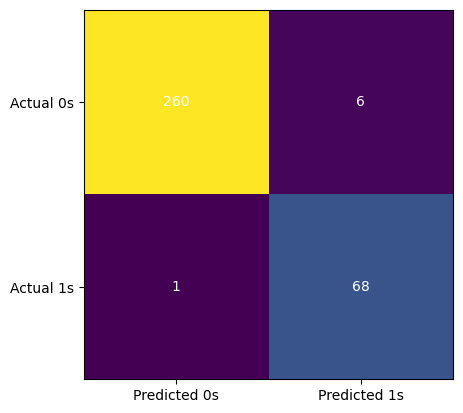

In [71]:
fig,ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [72]:
report = classification_report(y_test,y_pred_cat)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.92      0.99      0.95        69

    accuracy                           0.98       335
   macro avg       0.96      0.98      0.97       335
weighted avg       0.98      0.98      0.98       335



### Discription:
<b>XgboostClassifier</b> gave best results and it generalized on the data set as compared to <b>RandomForestClassifier and CatBoostClassifier</b>.
<br>Xgboost: 
1. <u>Training score: 98.3%</u>
2. <u>Testing socore: 96.7%</u>